# **Part 4: Apply What We Have Learnt on Real-World Data**

During this tutorial we have learnt about supervised and unsupervised machine learning, and learnt about ome examples of these, including the k-nearest neighbour and the principal component analysis algorithms.

In the last part of this tutorial, we will apply these techniques to a real-world data relating to testing the quality of red and white wine. Here, various information about the wine is recorded, such as acidity, concentrations of critic acid, sugars, and other, sulphates, alcohol percentage, and the overall quality of the wine.

There are several goals for this part of the tutorial:

* **Descriptors**: It is important to think about what descriptors will be useful for describing the problems you are trying to solve with machine learning. Many descriptors have been given, maybe some are more useful that others, maybe some are not important (I actually dont know).
* **Reuse your code**: It most cases, the easiest way to solve a programming problem is to take code you have already written and mold it so you can use the same code for different tasks. **Look at the code you have use in Part 2 and 3, and copy and paste the code from these that you find useful for achieve your objectives in these Part 4 examples.**
* **What do I do if I cant do something? Google it!**: Knowing how to use google to figure out how to do some programming task is crucial for doing any programming. When you face a problem you dont know how to solve, **try to use google to figure out how to solve your problem**. This is particularly useful with using the Scikit machine learning program in python
* **Read the Documentation**: Sometimes it is useful to read the documentation about how making plots in python works, or what variables a machine learning algorithm in scikit-learn can use. For example, here is the documentation for the k-nearest neighbour algorithm in scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html. This documentation may help you to solve programming problems.
* **Play**: A really reaaaaaaally important part of data science and programming in general is to play around with your data and dont be afraid to break things in order to learn something new about your dataset or the python programs you use, just make a backup copy of your work just in case you need to revert back to an early version of your code. In particular, see what you can do in Sckit-Learn: https://scikit-learn.org/stable/

Think about these goals when you are writing machine learning code for these applications.

## **Preamble: Download the Packages for Running the Code**

Run the code below to download the packages and files needed for this part of the tutorial.

In [1]:
# Numpy and Pandas modules.
import numpy as np
import pandas as pd

# Plotly and Matplotlib for plotting.
import pylab as pl
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

# Download and install packages that will be helpful for this section.
%pip install -q ipywidgets
!apt-get -qq install subversion
!svn checkout https://github.com/geoffreyweal/MESA_Bootcamp_2023_ML_Tutorial/trunk/Notebooks/real_world_files

# Clear the output just for this cell cause there is a lot going on and doesnt help us.
# Comment this out if there is a problem when loading the programs and packages above
from IPython.display import clear_output
clear_output()

## **Step 1: Get the Data**

Run the code below to extract the data from the ``winequality-red.csv`` and ``winequality-white.csv`` files:

In [2]:
red_wine_data = pd.read_csv("real_world_files/winequality-red.csv",delimiter=';')
white_wine_data = pd.read_csv("real_world_files/winequality-white.csv",delimiter=';')

You can see the data that has been recorded for red and white wine below:

In [3]:
print('Red Wine Data')
print('Number of data points: '+str(len(red_wine_data)))
print()
display(red_wine_data)

Red Wine Data
Number of data points: 1599



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
print('White Wine Data')
print('Number of data points: '+str(len(white_wine_data)))
print()
display(white_wine_data)

White Wine Data
Number of data points: 4898



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## **Step 2: Analysing/Visualising the Raw Data**

It is useful to visualize the data in various ways, just to see what the ranges of the data are and what it contains.

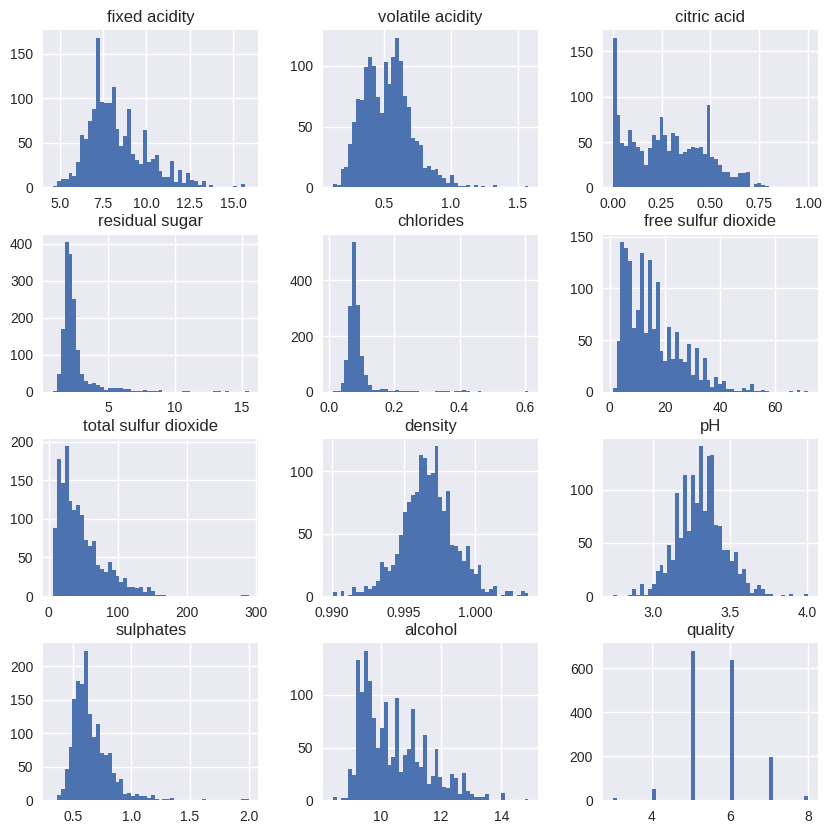

In [5]:
red_wine_data.hist(bins=50,figsize=(10,10))
# display histogram
plt.show()

## **Step 3: ML example with K-Nearest Neighbours Classification Algorithm**

The aim is to create a machine learning model that can predict what features make a high quality wine.

To begin, we need to move our data into a form where for the feature vectors:

* Rows are the entries for each wine sampled
* Columns are all the different feature of the wine (feature vectors).

In [6]:
# Convert our pandas data into a numpy array
red_wine_value_data = np.array(red_wine_data)

# Collect the X data for our wine data, where:
#   - Rows are the entries for each wine sampled
#   - Columns are all the different feature of the wine (feature vectors).
X_red_wine = np.array(red_wine_value_data)[:, :-1]
print('X_red_wine shape: '+str(X_red_wine.shape))

# Set the quality of the wine as our labels.
y_red_wine = np.array(red_wine_value_data)[:, -1]
print('X_red_wine shape: '+str(y_red_wine.shape))

X_red_wine shape: (1599, 11)
X_red_wine shape: (1599,)


Second, if you want to include an unsupervised machine learning algorithm, we can do this at this step in the process:

In [7]:
# Initialise the PCA algorithm that will spread the data into 3 dimensions.
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE

# -----------------------------------------------------------------------------------------------
# Comment and uncomment out the following unsupervised ML models to try them out.
unsupervised_model = PCA(n_components=3)
#unsupervised_model = Isomap(n_components=3)
#unsupervised_model = TSNE(n_components=3,random_state=42) # We dont need to set ``random_state`` to 42, this will just allow us to compare results between people for teaching purposes.
# -----------------------------------------------------------------------------------------------

# Perform the PCA algorithm upon our dataset.
#_red_wine = unsupervised_model.fit_transform(X_red_wine)

We can look at the data to see how complex it is (however, the best we can do is with a 3D plot):

In [8]:
'''
# Show the dataset that has been spread out with the PCA algorithm in 3 dimensions
# with a 3D scatterplot.
data = np.concatenate((X_red_wine, np.atleast_2d(y_red_wine).T), axis=1)
df = pd.DataFrame(data, columns=['Feature 1', 'Feature 2', 'Feature 3', 'Quality'])
fig = px.scatter_3d(df, x='Feature 1', y='Feature 2', z='Feature 3', color='Quality', color_continuous_scale=plotly.colors.sequential.Rainbow, width=1000, height=800)
#fig.update_layout(showlegend=False)
fig.show()
'''

"\n# Show the dataset that has been spread out with the PCA algorithm in 3 dimensions\n# with a 3D scatterplot.\ndata = np.concatenate((X_red_wine, np.atleast_2d(y_red_wine).T), axis=1)\ndf = pd.DataFrame(data, columns=['Feature 1', 'Feature 2', 'Feature 3', 'Quality'])\nfig = px.scatter_3d(df, x='Feature 1', y='Feature 2', z='Feature 3', color='Quality', color_continuous_scale=plotly.colors.sequential.Rainbow, width=1000, height=800)\n#fig.update_layout(showlegend=False)\nfig.show()\n"

We then want to split our data into a training and testing set:

In [9]:
# Split the data into training and testing data.
from sklearn.model_selection import train_test_split
X_red_wine_train, X_red_wine_test, y_red_wine_train, y_red_wine_test = train_test_split(X_red_wine, y_red_wine, stratify=y_red_wine, train_size=0.7, random_state=42)

print('-----------------------------')
print('X_red_wine_train = '+str(X_red_wine_train.shape))
print('y_red_wine_train = '+str(y_red_wine_train.shape))
print('-----------------------------')
print('X_red_wine_test  = '+str(X_red_wine_test.shape))
print('y_red_wine_test  = '+str(y_red_wine_test.shape))
print('-----------------------------')

-----------------------------
X_red_wine_train = (1119, 11)
y_red_wine_train = (1119,)
-----------------------------
X_red_wine_test  = (480, 11)
y_red_wine_test  = (480,)
-----------------------------


We can now perform our kNN Classification Model on our red wine data, where we change the number of neighbours to see what is the best bersion

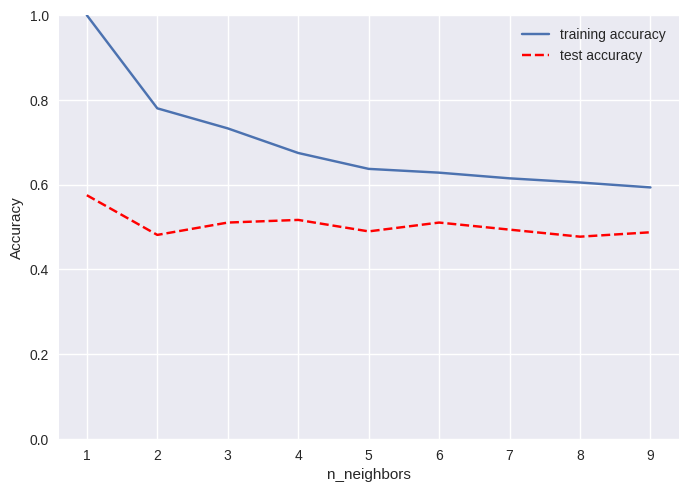

In [10]:
# First, let load the K-Nearest Neighbours Regression Model
from sklearn.neighbors import KNeighborsClassifier

# Testing KNN algorithm for several values of ``n_neighbors``.
training_accuracy = []
test_accuracy = []
neighbors_settings = tuple(range(1, 10))
for n_neighbors in neighbors_settings:
    # Build the model.
    ml_algorithm = KNeighborsClassifier(n_neighbors=n_neighbors)
    ml_algorithm.fit(X_red_wine_train, y_red_wine_train)
    # Record training set accuracy.
    training_accuracy.append(ml_algorithm.score(X_red_wine_train, y_red_wine_train))
    # Record generalization accuracy.
    test_accuracy.append(ml_algorithm.score(X_red_wine_test, y_red_wine_test))

# Plot results for several values of ``n_neighbors``.
pl.plot(neighbors_settings, training_accuracy, '-', label="training accuracy")
pl.plot(neighbors_settings, test_accuracy, 'r--', label="test accuracy")
pl.ylabel("Accuracy")
pl.xlabel("n_neighbors")
pl.ylim((0.0,1.0))
pl.legend()
pl.show()

We can also look at the confusion matrix to determine what quality values are being correctly and incorrectly identified for the various values of ``n_neighbors`` (note: the confusion matrix can only used for classification algorithms, at least easily).

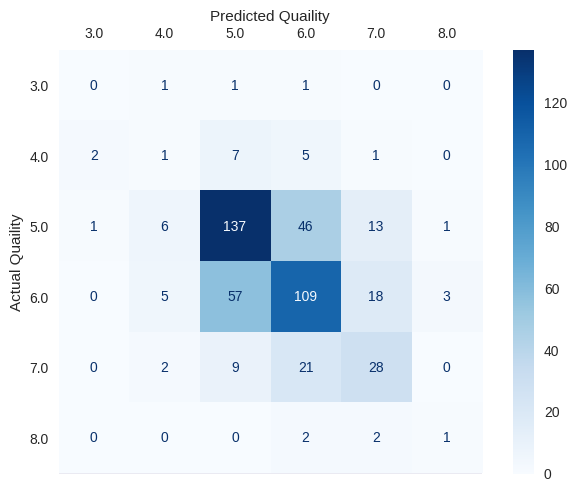

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Try changing this value and see what happens to the confusion matrix
n_neighbors = 1

# Build the model.
ml_algorithm = KNeighborsClassifier(n_neighbors=n_neighbors)
ml_algorithm.fit(X_red_wine_train, y_red_wine_train)
# Record generalization accuracy.
y_red_wine_test_predictions = ml_algorithm.predict(X_red_wine_test)

# Showing the results of the confusion matrix with colours. The darker the colour, the greater the number.
labels = sorted(set(y_red_wine_test.tolist() + y_red_wine_test_predictions.tolist()))
cm = confusion_matrix(y_red_wine_test, y_red_wine_test_predictions, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap='Blues')
plt.grid(False)
plt.ylabel('Actual Quaility')
plt.xlabel('Predicted Quaility')
plt.yticks(ticks=range(len(labels)),labels=labels)
plt.xticks(ticks=range(len(labels)),labels=labels)
ax = plt.gca()
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.show()

We can also get scikit learn to give a more detailed report of how well our kNN algorithm worked. This can often help to figure out what type of wine quality data is being predicted correctly or not.

The metrics given are:

* **Precision**: Percentage of correct positive predictions relative to total positive predictions.
* **Recall**: Percentage of correct positive predictions relative to total actual positives.
* **F1-Score**: A weighted harmonic mean of precision and recall. The closer to 1, the better the model:
  * F1 Score $= \frac{2 * (Precision * Recall)}{(Precision + Recall)}$
* **Support**: The number of actual occurrences of the class in the specified dataset

In [12]:
from sklearn.metrics import classification_report
report = classification_report(y_red_wine_test, y_red_wine_test_predictions)
print(report)

              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         3
         4.0       0.07      0.06      0.06        16
         5.0       0.65      0.67      0.66       204
         6.0       0.59      0.57      0.58       192
         7.0       0.45      0.47      0.46        60
         8.0       0.20      0.20      0.20         5

    accuracy                           0.57       480
   macro avg       0.33      0.33      0.33       480
weighted avg       0.57      0.57      0.57       480



## **Step 4: Wanna play with a Neural Network**

We can also apply our data to a neutral network classification algorithm without doing to much to our original code. All we need to do is to change ``KNeighborsClassifier`` to ``MLPClassifier``

In [13]:
# ------------------------------------------------------------------------
# Reload the red and the white wine data.
red_wine_data = pd.read_csv("real_world_files/winequality-red.csv",delimiter=';')
white_wine_data = pd.read_csv("real_world_files/winequality-white.csv",delimiter=';')

# ------------------------------------------------------------------------
# Convert our pandas data into a numpy array
red_wine_value_data = np.array(red_wine_data)

# Collect the X data for our wine data, where:
#   - Rows are the entries for each wine sampled
#   - Columns are all the different feature of the wine (feature vectors).
X_red_wine = np.array(red_wine_value_data)[:, :-1]
print('X_red_wine shape: '+str(X_red_wine.shape))

# Set the quality of the wine as our labels.
y_red_wine = np.array(red_wine_value_data)[:, -1]
print('X_red_wine shape: '+str(y_red_wine.shape))

# ------------------------------------------------------------------------
# Split the data into training and testing data.
from sklearn.model_selection import train_test_split
X_red_wine_train, X_red_wine_test, y_red_wine_train, y_red_wine_test = train_test_split(X_red_wine, y_red_wine, stratify=y_red_wine, train_size=0.7, random_state=42)

# ------------------------------------------------------------------------
# Apply a Neural Network to our wine data
from sklearn.neural_network import MLPClassifier

# Apply our neural network settings list, where each number in the list are the number of neurons i each hidden layer.
# For example, (200,100) means there are 200 neurons in the first layer and 100 neuron in the second layer.
hidden_layer_sizes = (200,100)

# Run and fit the NN algorithm
model = MLPClassifier(hidden_layer_sizes=(200,100), max_iter=1000)
model.fit(X_red_wine_train, y_red_wine_train)

# ------------------------------------------------------------------------
# Obtain the predictions for our test set
y_red_wine_test_predictions = model.predict(X_red_wine_test)

X_red_wine shape: (1599, 11)
X_red_wine shape: (1599,)


We can obtain the accuracy for our neural network at making predictions about the quality of our wine.

In [14]:
# Compare the results from our predictions with what the number actually is.
from sklearn.metrics import accuracy_score
print('accuracy score: '+str(accuracy_score(y_red_wine_test, y_red_wine_test_predictions)))

accuracy score: 0.58125


We can see what our neural network algorithm is doing well and not well with regards to wine quality predictions.

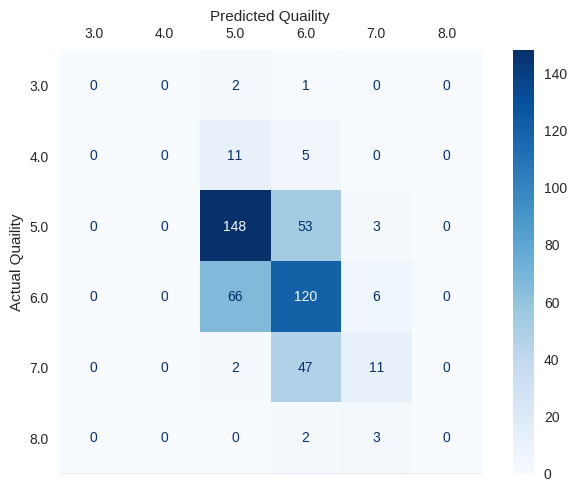

In [15]:
from sklearn.metrics import confusion_matrix

# Showing the results of the confusion matrix with colours. The darker the colour, the greater the number.
labels = sorted(set(y_red_wine_test.tolist() + y_red_wine_test_predictions.tolist()))
cm = confusion_matrix(y_red_wine_test, y_red_wine_test_predictions, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.grid(False)
plt.ylabel('Actual Quaility')
plt.xlabel('Predicted Quaility')
plt.yticks(ticks=range(len(labels)),labels=labels)
plt.xticks(ticks=range(len(labels)),labels=labels)
ax = plt.gca()
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.show()

We can also get scikit learn to give a more detailed report of how well our neural network algorithm worked. This can often help to figure out what type of wine quality data is being predicted correctly or not.

The metrics given are:

* **Precision**: Percentage of correct positive predictions relative to total positive predictions.
* **Recall**: Percentage of correct positive predictions relative to total actual positives.
* **F1-Score**: A weighted harmonic mean of precision and recall. The closer to 1, the better the model:
  * F1 Score $= \frac{2 * (Precision * Recall)}{(Precision + Recall)}$
* **Support**: The number of actual occurrences of the class in the specified dataset

In [16]:
from sklearn.metrics import classification_report
report = classification_report(y_red_wine_test, y_red_wine_test_predictions)
print(report)

              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         3
         4.0       0.00      0.00      0.00        16
         5.0       0.65      0.73      0.68       204
         6.0       0.53      0.62      0.57       192
         7.0       0.48      0.18      0.27        60
         8.0       0.00      0.00      0.00         5

    accuracy                           0.58       480
   macro avg       0.28      0.26      0.25       480
weighted avg       0.54      0.58      0.55       480



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Step 5: Go nuts with the code**

The aim is to create a machine learning model that can predict what features make a high quality wine.

Have a good with trying out some other of these other methods:

``[LinearRegression, SVR, KNeighborsRegressor, DecisionTreeRegressor, RandomForestRegressor, MLPRegressor, MinMaxScalar]``

Take a look at the documentation on https://scikit-learn.org/stable/ on how to implement these algorithms. Copy the code above to help!

In [17]:
# Enter your code in here



## **Other Resources**

Here are some resources to look at for this specific example:

* https://rpubs.com/garrym3k/175762
* https://www.analyticsvidhya.com/blog/2021/04/wine-quality-prediction-using-machine-learning/
* https://medium.com/@chemistry8526/data-driven-wine-quality-analysis-exploring-red-and-white-wine-datasets-with-my-vivino-project-3b4618394549
* https://medium.com/analytics-vidhya/predicting-red-wine-quality-using-machine-learning-model-34e2b1b8d498